In [ ]:
from numpy import array
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import math

In [ ]:

df=pd.read_csv("/content/drive/MyDrive/stocks.csv" )
df["Date"] = pd.to_datetime(df['Date'],format="%Y-%m-%d")

In [ ]:
df.shape

(2159, 10)

In [ ]:
df.head()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.13,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.35,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.25,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.73,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.80,194.449997,180.520004,26.760000,318.590851,1314.500000


In [ ]:
df.tail()

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971
2158,2020-08-11,437.500000,180.130005,30.200001,21.500000,3080.669922,126.750000,1374.390015,1480.319946,3333.689941


In [ ]:
start = dt.datetime(2012,1,12)
end = dt.datetime(2020,8,5)
Goog=df['GOOG']

In [ ]:
Goog.head()

0    313.644379
1    311.328064
2    313.116364
3    315.273285
4    318.590851
Name: GOOG, dtype: float64

In [ ]:
Goog.isna().sum()

0

#'IBM' Stock analysis for monthly , weekly as well as daily stock prices.

In [ ]:
df['IBM_week'] = df.IBM.rolling(7).mean().shift()
df['IBM_month'] = df.IBM.rolling(30).mean()

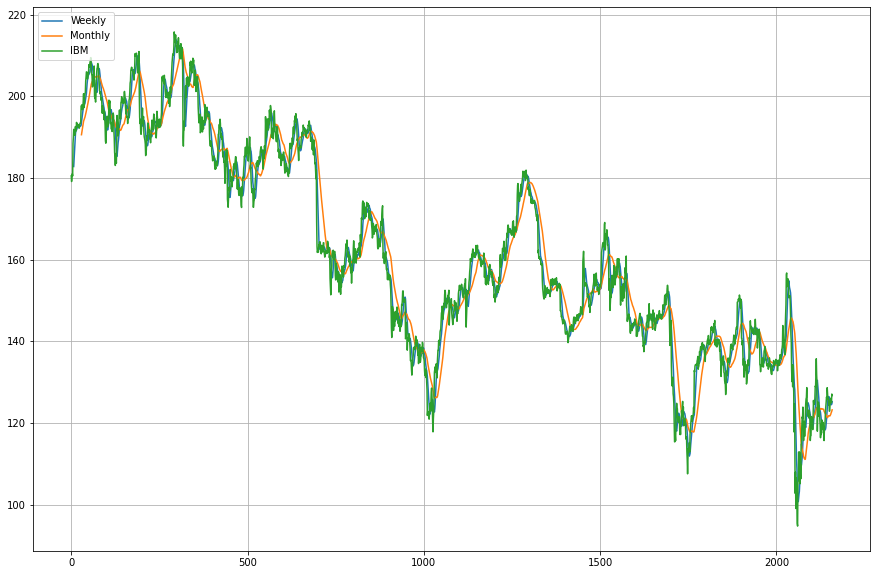

In [ ]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['IBM_week'],label='Weekly')
plt.plot(df['IBM_month'], label='Monthly')
plt.plot(df['IBM'],label='IBM')
plt.legend(loc=2)

#APPL stocks

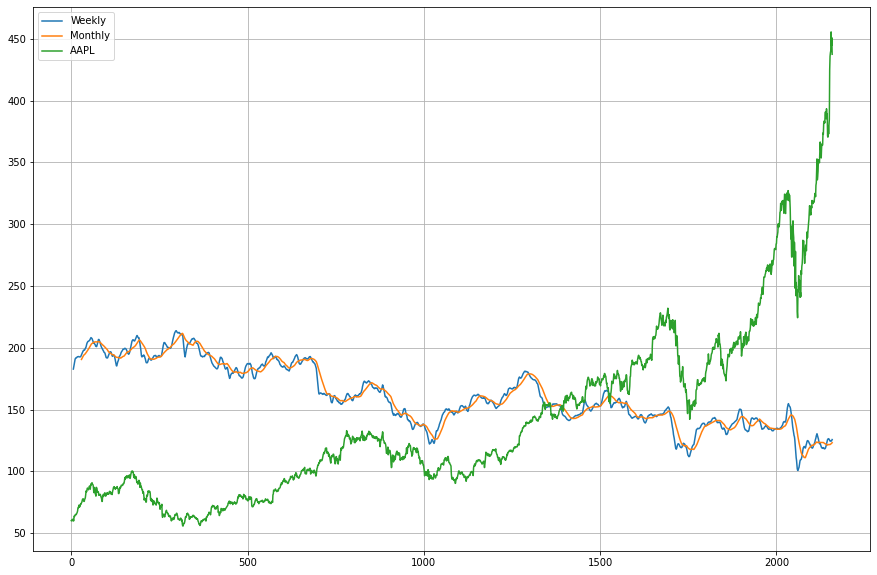

In [ ]:
df['AAPL_week'] = df.IBM.rolling(7).mean()
df['AAPL_month'] = df.IBM.rolling(30).mean()
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(df['AAPL_week'],label='Weekly')
plt.plot(df['AAPL_month'], label='Monthly')
plt.plot(df['AAPL'],label='AAPL')
plt.legend(loc=2)

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
adf_test(Goog)

1. ADF :  -0.2116028523414724
2. P-Value :  0.9371243822985593
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2136
5. Critical Values :
	 1% :  -3.4334151573147094
	 5% :  -2.8628940688135
	 10% :  -2.5674908403908736


In [ ]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
  print ('Results of KPSS Test:')
  kpsstest = kpss(timeseries, regression='c')
  kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
  for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
  print (kpss_output)

In [ ]:
kpss_test(Goog)

Results of KPSS Test:
Test Statistic            7.8106
p-value                   0.0100
Lags Used                26.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
goog=Goog.values

In [ ]:
goog

array([ 313.644379,  311.328064,  313.116364, ..., 1494.48999 ,
       1496.099976, 1480.319946])

In [ ]:
#dataframe with only apple col
data = df.filter(['GOOG'])
#convert df into numpy arr
dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

1728

In [ ]:
#scaling
scaler = MinMaxScaler(feature_range=(0,1))
#transforming values to 0&1 before it is passed into the nw
scaled_data = scaler.fit_transform(dataset)
scaled_data=scaled_data.flatten()
scaled_data

array([0.02725811, 0.02546253, 0.0268488 , ..., 0.94263605, 0.94388409,
       0.9316516 ])

In [ ]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

n_steps=5 
X, y = split_sequence(scaled_data, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[0.02725811 0.02546253 0.0268488  0.02852082 0.03109256] 0.010402803300525398
[0.02546253 0.0268488  0.02852082 0.03109256 0.0104028 ] 0.010221307642083621
[0.0268488  0.02852082 0.03109256 0.0104028  0.01022131] 0.00844891123182312
[0.02852082 0.03109256 0.0104028  0.01022131 0.00844891] 0.004031391819500463
[0.03109256 0.0104028  0.01022131 0.00844891 0.00403139] 0.00349464045020606
[0.0104028  0.01022131 0.00844891 0.00403139 0.00349464] 0.008082063352157581
[0.01022131 0.00844891 0.00403139 0.00349464 0.00808206] 0.007197793428418392
[0.00844891 0.00403139 0.00349464 0.00808206 0.00719779] 0.008132263784159405
[0.00403139 0.00349464 0.00808206 0.00719779 0.00813226] 0.008410278937790727
[0.00349464 0.00808206 0.00719779 0.00813226 0.00841028] 0.01006299554607934
[0.00808206 0.00719779 0.00813226 0.00841028 0.010063  ] 0.014395563601181854
[0.00719779 0.00813226 0.00841028 0.010063   0.01439556] 0.019322793482390965
[0.00813226 0.00841028 0.010063   0.01439556 0.01932279] 0.01842693

In [ ]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (n_steps, n_features)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics='acc')
# fit model
regressor.fit(X, y, epochs=200,validation_split=0.33,verbose=1)

Epoch 1/200
46/46 [==============================] - 31s 66ms/step - loss: 0.0413 - acc: 4.1446e-04 - val_loss: 0.0021 - val_acc: 0.0014
Epoch 2/200
46/46 [==============================] - 1s 19ms/step - loss: 0.0018 - acc: 0.0023 - val_loss: 0.0031 - val_acc: 0.0014
Epoch 3/200
46/46 [==============================] - 1s 18ms/step - loss: 0.0010 - acc: 0.0017 - val_loss: 0.0024 - val_acc: 0.0014
Epoch 4/200
46/46 [==============================] - 1s 19ms/step - loss: 0.0012 - acc: 7.8972e-04 - val_loss: 0.0018 - val_acc: 0.0014
Epoch 5/200
46/46 [==============================] - 1s 18ms/step - loss: 9.8838e-04 - acc: 0.0020 - val_loss: 0.0029 - val_acc: 0.0014
Epoch 6/200
46/46 [==============================] - 1s 19ms/step - loss: 8.4332e-04 - acc: 2.7397e-04 - val_loss: 0.0016 - val_acc: 0.0014
Epoch 7/200
46/46 [==============================] - 1s 18ms/step - loss: 9.7064e-04 - acc: 2.5319e-04 - val_loss: 0.0031 - val_acc: 0.0014
Epoch 8/200
46/46 [============================

In [ ]:
x=Goog.iloc[1758:]

In [ ]:
# demonstrate prediction
x_input = array([0.91975247, 0.92645011, 0.94698485, 0.94263605, 0.94388409])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = regressor.predict(x_input, verbose=0)
print(yhat)

[[0.7772312]]


#Stacked LSTM

In [ ]:
df1=df.reset_index()['AAPL']

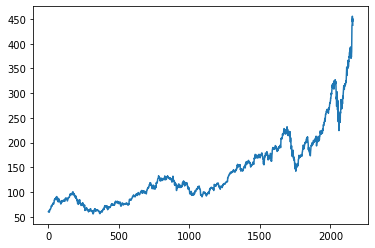

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.01102638]
 [0.01046185]
 [0.01220906]
 ...
 [0.97208751]
 [0.98824476]
 [0.95470465]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(1403, 756)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(1302, 100)
(1302,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(655, 100)
(655,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 8s 147ms/step - loss: 0.0055 - val_loss: 0.0074
Epoch 2/100
21/21 [==============================] - 2s 81ms/step - loss: 7.3898e-04 - val_loss: 0.0015
Epoch 3/100
21/21 [==============================] - 2s 80ms/step - loss: 1.7542e-04 - val_loss: 0.0013
Epoch 4/100
21/21 [==============================] - 2s 82ms/step - loss: 1.3293e-04 - val_loss: 0.0013
Epoch 5/100
21/21 [==============================] - 2s 82ms/step - loss: 1.3069e-04 - val_loss: 0.0013
Epoch 6/100
21/21 [==============================] - 2s 81ms/step - loss: 1.2294e-04 - val_loss: 0.0012
Epoch 7/100
21/21 [==============================] - 2s 82ms/step - loss: 1.1438e-04 - val_loss: 0.0013
Epoch 8/100
21/21 [==============================] - 2s 82ms/step - loss: 1.0705e-04 - val_loss: 0.0012
Epoch 9/100
21/21 [==============================] - 2s 82ms/step - loss: 1.0138e-04 - val_loss: 0.0011
Epoch 10/100
21/21 [==============================] - 2s 81ms/step 

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

104.07403987184794

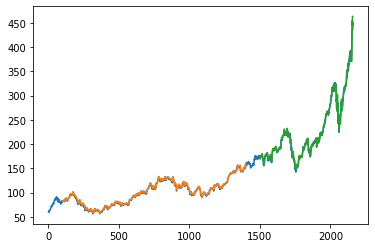

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

756

In [ ]:
x_input=test_data[756:].reshape(1,-1)
x_input.shape

(1, 0)

In [ ]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.2628683  0.25271373 0.23745685 0.22770248 0.25356411 0.25101295
 0.25121304 0.25498977 0.25543995 0.21609725 0.23127907 0.23045369
 0.23750689 0.24390976 0.24513533 0.2413586  0.23563104 0.24330951
 0.24798661 0.25028764 0.25268874 0.24388476 0.24543545 0.24238407
 0.25503976 0.25138814 0.24733629 0.27377321 0.27674955 0.27694965
 0.28877996 0.29610824 0.29625834 0.28800462 0.28667902 0.28422789
 0.28787955 0.28610374 0.28765446 0.28670402 0.28797958 0.29073084
 0.28830474 0.2930819  0.2962333  0.29648343 0.29783402 0.29353208
 0.29808415 0.30028515 0.29948478 0.29695865 0.29190637 0.29293184
 0.30791356 0.31294084 0.31494175 0.319994   0.32597169 0.33072385
 0.32699716 0.331074   0.34840678 0.33830225 0.33252466 0.32764743
 0.33184935 0.33247463 0.335551   0.33877747 0.3457306  0.3490571
 0.34990747 0.35318394 0.36093745 0.35943676 0.36223801 0.35806113
 0.35786104 0.35876144 0.35881148 0.36851586 0.37034167 0.37201742
 0.37939573 0.37859539 0.37389326 0.37144217 0.3722

ValueError: ignored